In [1]:
%reload_ext autoreload
%autoreload 2

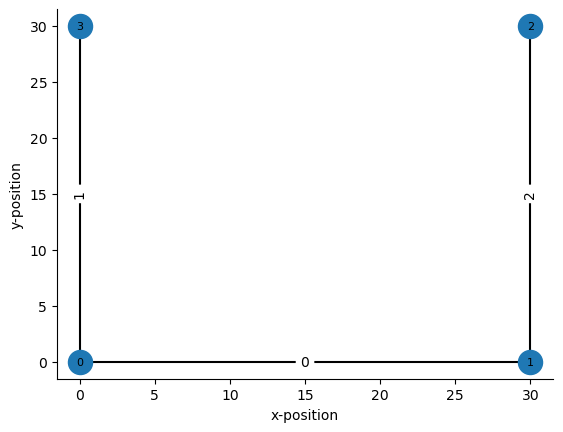

In [2]:
from track_linearization import make_track_graph, plot_track_graph
import matplotlib.pyplot as plt

node_positions = [
    (0, 0),  # xy position of node 0
    (30, 0),  # xy position of node 1
    (30, 30),  # xy position of node 2
    (0, 30),  # xy position of node 3
]

edges = [
    (0, 1),  # connects node 0 and node 1
    (0, 3),  # connects node 0 and node 3
    (1, 2),  # connects node 1 and node 2
]

track_graph = make_track_graph(node_positions, edges)

fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

<Axes: xlabel='Linear Position [cm]'>

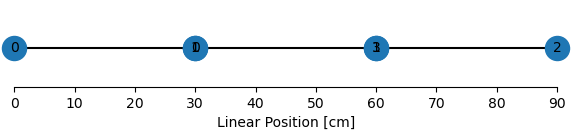

In [3]:
from track_linearization.utils import plot_graph_as_1D

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph, ax=ax)

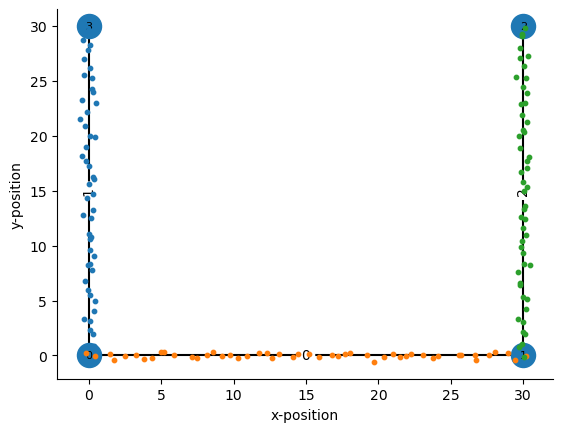

In [4]:
import numpy as np
from scipy.stats import multivariate_normal

fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

x = np.linspace(0, 30)

position = np.concatenate(
    (
        np.stack((np.zeros_like(x), x[::-1]), axis=1),
        np.stack((x, np.zeros_like(x)), axis=1),
        np.stack((np.ones_like(x) * 30, x), axis=1),
    )
)
position += multivariate_normal(mean=0, cov=0.05).rvs(position.shape)

plt.scatter(position[:50, 0], position[:50, 1], s=10, zorder=11)
plt.scatter(position[50:100, 0], position[50:100, 1], s=10, zorder=11)
plt.scatter(position[100:, 0], position[100:, 1], s=10, zorder=11)

In [5]:
from track_linearization import get_linearized_position

position_df = get_linearized_position(position=position, track_graph=track_graph)

<Axes: xlabel='Time', ylabel='Linear Position [cm]'>

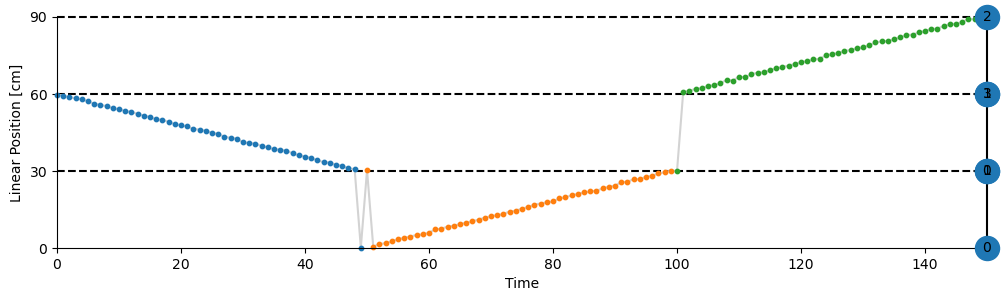

In [6]:
fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.axhline(30, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(60, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(90, color="black", zorder=0, linestyle="--", clip_on=False)
ax.set_yticks([0, 30, 60, 90])
ax.set_ylim([0, 90])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph, ax=ax, axis="y", other_axis_start=position_df.index.max() + 1
)

<Axes: xlabel='Linear Position [cm]'>

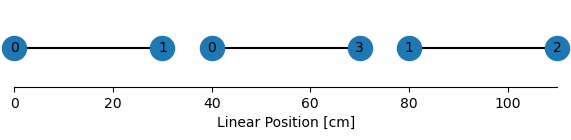

In [7]:
from track_linearization import get_linearized_position

edge_spacing = 10

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph, edge_spacing=edge_spacing, ax=ax)

<Axes: xlabel='Time', ylabel='Linear Position [cm]'>

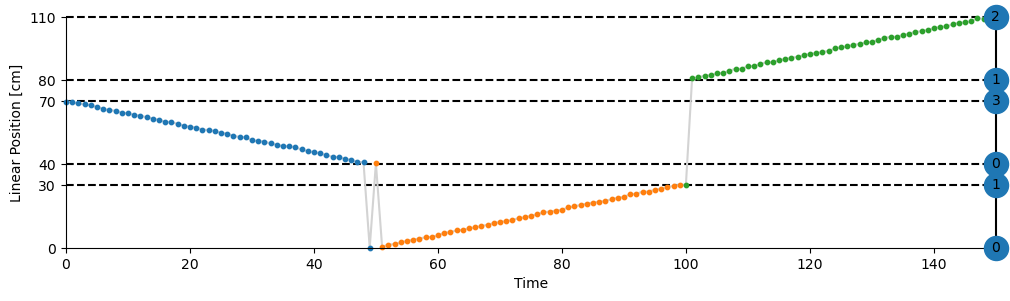

In [8]:
position_df = get_linearized_position(
    position=position, track_graph=track_graph, edge_spacing=edge_spacing
)

fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.axhline(30, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(40, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(70, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(80, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(110, color="black", zorder=0, linestyle="--", clip_on=False)
ax.set_yticks([0, 30, 40, 70, 80, 110])
ax.set_ylim([0, 110])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)

<Axes: xlabel='Linear Position [cm]'>

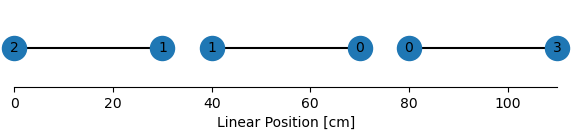

In [9]:
from track_linearization import get_linearized_position

edge_spacing = 10
edge_order = [
    (2, 1),  # connects node 2 and node 1
    (1, 0),  # connects node 1 and node 0
    (0, 3),  # connects node 0 and node 3
]

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph, edge_spacing=edge_spacing, edge_order=edge_order, ax=ax)

<Axes: xlabel='Time', ylabel='Linear Position [cm]'>

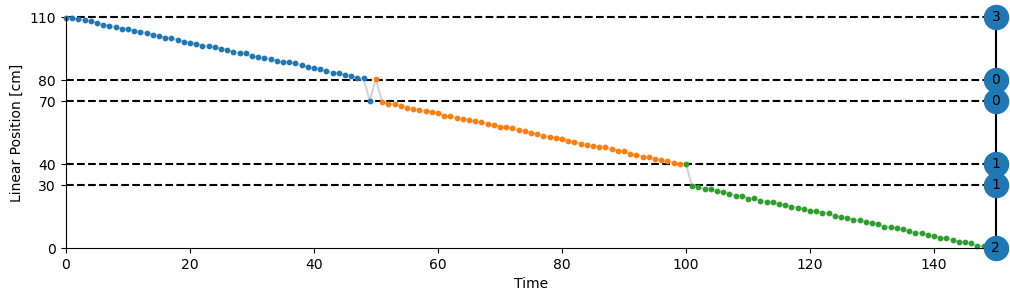

In [10]:
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_spacing=edge_spacing,
    edge_order=edge_order,
)

fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.axhline(30, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(40, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(70, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(80, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(110, color="black", zorder=0, linestyle="--", clip_on=False)
ax.set_yticks([0, 30, 40, 70, 80, 110])
ax.set_ylim([0, 110])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_order=edge_order,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)

<Axes: xlabel='Linear Position [cm]'>

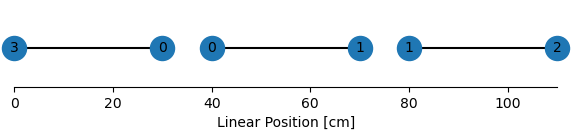

In [11]:
from track_linearization import get_linearized_position

edge_spacing = 10
edge_order = [
    (3, 0),
    (0, 1),
    (1, 2),
]

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph, edge_spacing=edge_spacing, edge_order=edge_order, ax=ax)

<Axes: xlabel='Time', ylabel='Linear Position [cm]'>

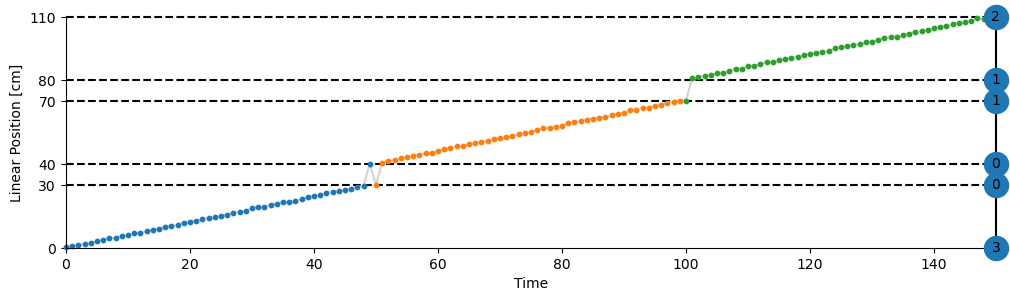

In [12]:
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_spacing=edge_spacing,
    edge_order=edge_order,
)

fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.axhline(30, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(40, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(70, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(80, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(110, color="black", zorder=0, linestyle="--", clip_on=False)
ax.set_yticks([0, 30, 40, 70, 80, 110])
ax.set_ylim([0, 110])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_order=edge_order,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)

<Axes: xlabel='Time', ylabel='Linear Position [cm]'>

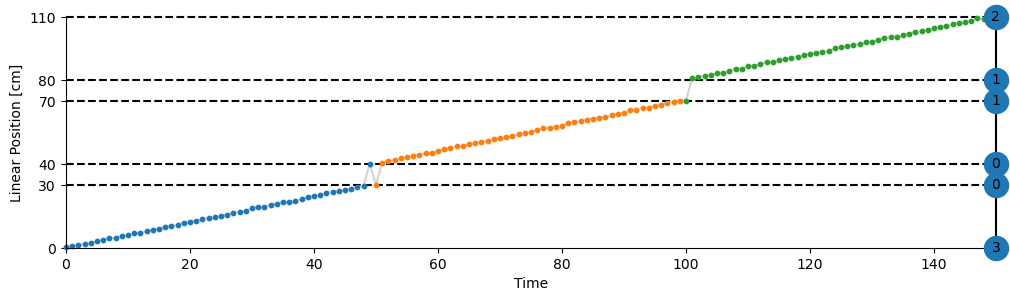

In [13]:
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_spacing=edge_spacing,
    edge_order=edge_order,
    use_HMM=False,
)

fig, ax = plt.subplots(figsize=(12, 3))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.axhline(30, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(40, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(70, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(80, color="black", zorder=0, linestyle="--", clip_on=False)
ax.axhline(110, color="black", zorder=0, linestyle="--", clip_on=False)
ax.set_yticks([0, 30, 40, 70, 80, 110])
ax.set_ylim([0, 110])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_order=edge_order,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)

## Circle

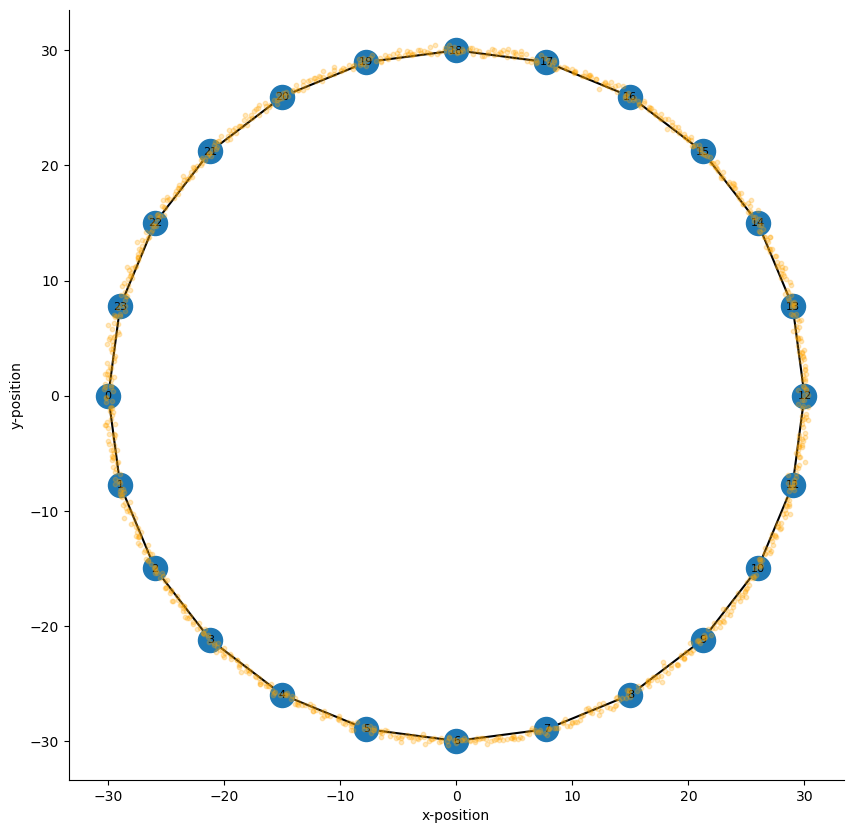

In [14]:
angle = np.linspace(-np.pi, np.pi, num=24, endpoint=False)
radius = 30

node_positions = np.stack((radius * np.cos(angle), radius * np.sin(angle)), axis=1)

node_ids = np.arange(node_positions.shape[0])
edges = np.stack((node_ids, np.roll(node_ids, shift=1)), axis=1)

track_graph = make_track_graph(node_positions, edges)

position_angles = np.linspace(-np.pi, 3 * np.pi, num=1000, endpoint=False)
position = np.stack(
    (radius * np.cos(position_angles), radius * np.sin(position_angles)), axis=1
)
position += multivariate_normal(mean=0, cov=0.05).rvs(position.shape)

fig, ax = plt.subplots(figsize=(10, 10))
plot_track_graph(track_graph, ax=ax)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.scatter(position[:, 0], position[:, 1], alpha=0.25, s=10, zorder=11, color="orange")

<Axes: xlabel='Linear Position [cm]'>

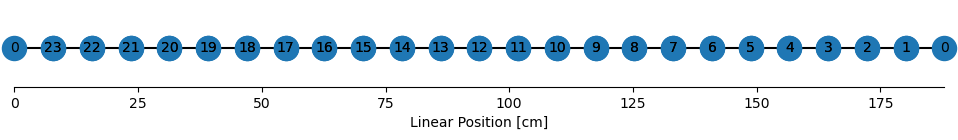

In [15]:
edge_spacing = 0
n_nodes = len(track_graph.nodes)
edge_order = np.stack(
    (np.roll(np.arange(n_nodes - 1, -1, -1), 1), np.arange(n_nodes - 1, -1, -1)), axis=1
)

fig, ax = plt.subplots(figsize=(n_nodes // 2, 1))
plot_graph_as_1D(track_graph, edge_spacing=edge_spacing, edge_order=edge_order, ax=ax)

<Axes: xlabel='Time', ylabel='Linear Position [cm]'>

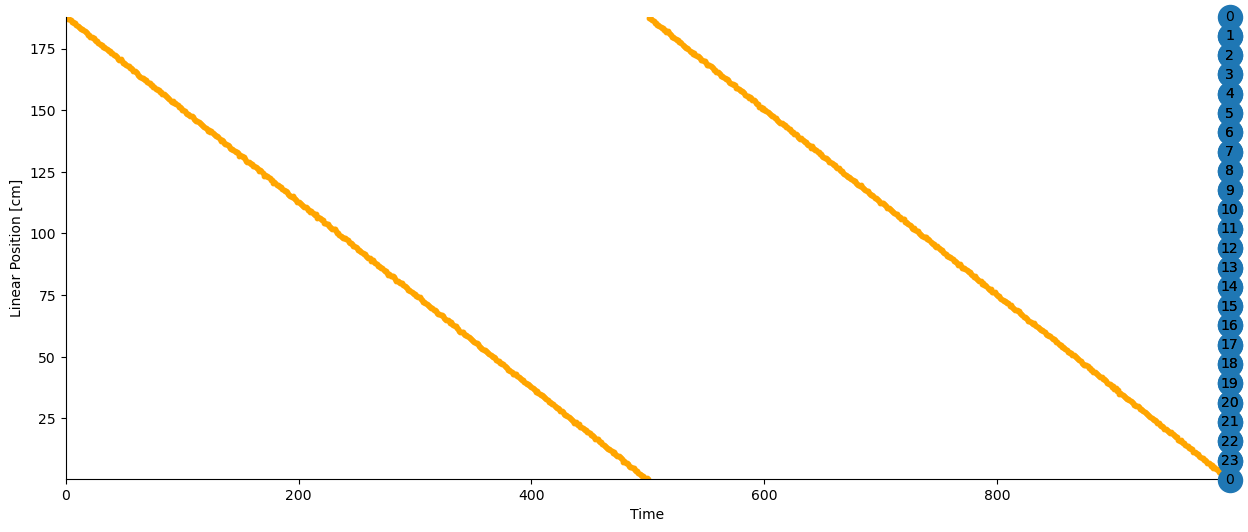

In [16]:
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_spacing=edge_spacing,
    edge_order=edge_order,
)

fig, ax = plt.subplots(figsize=(15, n_nodes // 4))
ax.scatter(position_df.index, position_df.linear_position, s=10, color="orange")
ax.set_ylim((position_df.linear_position.min(), position_df.linear_position.max()))
ax.set_xlim((0, position_df.index.max()))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
ax.spines["top"].set_visible(False)

plot_graph_as_1D(
    track_graph,
    edge_order=edge_order,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)

## W-Track

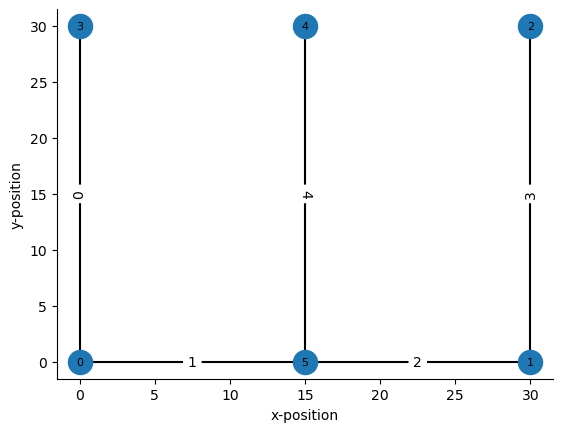

In [17]:
node_positions = [(0, 0), (30, 0), (30, 30), (0, 30), (15, 30), (15, 0)]

edges = [
    (3, 0),
    (0, 5),
    (4, 5),
    (5, 1),
    (1, 2),
]

track_graph = make_track_graph(node_positions, edges)

fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

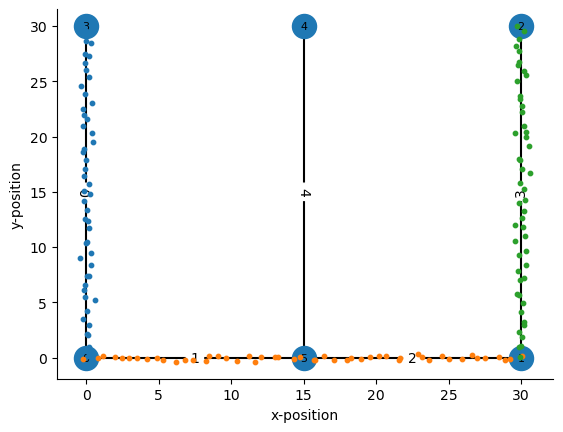

In [18]:
fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

x = np.linspace(0, 30)

position = np.concatenate(
    (
        np.stack((np.zeros_like(x), x[::-1]), axis=1),
        np.stack((x, np.zeros_like(x)), axis=1),
        np.stack((np.ones_like(x) * 30, x), axis=1),
    )
)
position += multivariate_normal(mean=0, cov=0.05).rvs(position.shape)

plt.scatter(position[:50, 0], position[:50, 1], s=10, zorder=11)
plt.scatter(position[50:100, 0], position[50:100, 1], s=10, zorder=11)
plt.scatter(position[100:, 0], position[100:, 1], s=10, zorder=11)

<Axes: xlabel='Linear Position [cm]'>

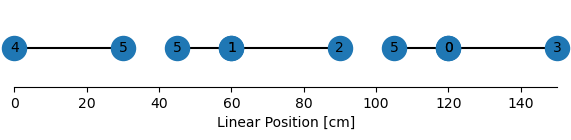

In [19]:
edge_order = [(4, 5), (5, 1), (1, 2), (5, 0), (0, 3)]
edge_spacing = [15, 0, 15, 0]

fig, ax = plt.subplots(figsize=(7, 1))
plot_graph_as_1D(track_graph, edge_spacing=edge_spacing, edge_order=edge_order, ax=ax)

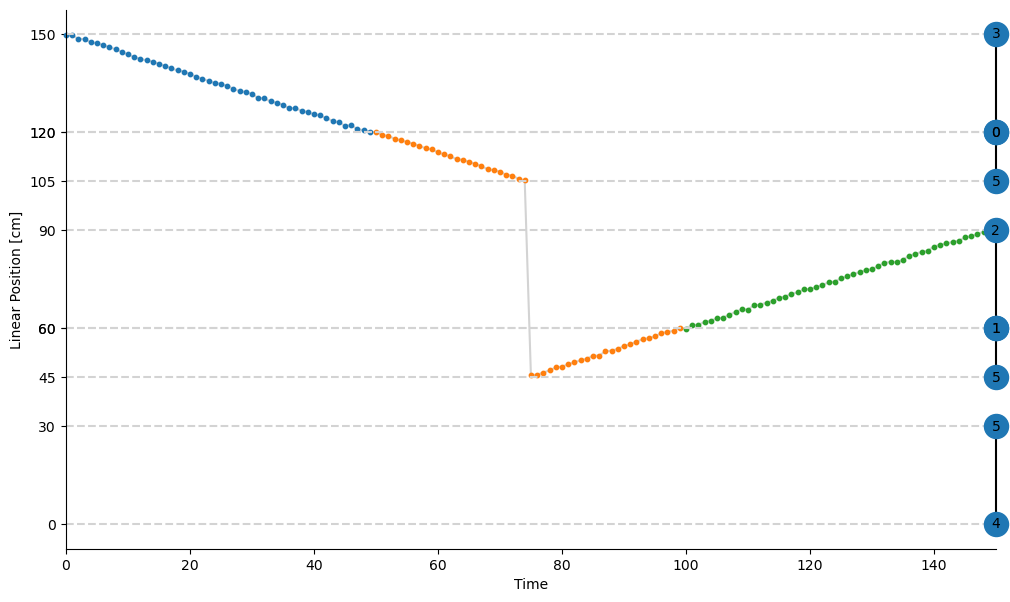

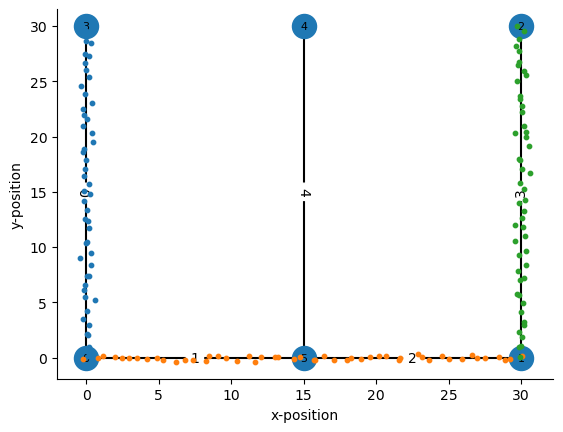

In [20]:
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_spacing=edge_spacing,
    edge_order=edge_order,
)

fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_order=edge_order,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)

start_node_linear_position = 0.0
ticks = []

for ind, edge in enumerate(edge_order):
    end_node_linear_position = (
        start_node_linear_position + track_graph.edges[edge]["distance"]
    )
    ax.axhline(start_node_linear_position, color="lightgrey", linestyle="--")
    ax.axhline(end_node_linear_position, color="lightgrey", linestyle="--")
    ticks.append(start_node_linear_position)
    ticks.append(end_node_linear_position)
    try:
        start_node_linear_position += (
            track_graph.edges[edge]["distance"] + edge_spacing[ind]
        )
    except IndexError:
        pass
ax.set_yticks(ticks)

fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.scatter(position[:50, 0], position[:50, 1], s=10, zorder=11)
plt.scatter(position[50:100, 0], position[50:100, 1], s=10, zorder=11)
plt.scatter(position[100:, 0], position[100:, 1], s=10, zorder=11)

## Using edge map

Sometimes there are multiple edges, but we wish to map them to the same linear segment.
You can do this by providing an `edge_map` dictionary to the `linearize_track` function.
This requires that you know the edge IDs of the edges you wish to map together.

Here is how to get the edge IDs from a track graph using networkx. This is in the format `(node1, node2): edge_id`.

In [21]:
import networkx as nx

nx.get_edge_attributes(track_graph, "edge_id")

{(0, 3): 0, (0, 5): 1, (1, 5): 2, (1, 2): 3, (4, 5): 4}

Let's say you want to map edges (0, 3) and (0, 5) to the first linear segment. You can do this by providing the following edge map.

In [22]:
edge_map = {0: 0, 1: 0, 2: 2, 3: 0, 4: 1}

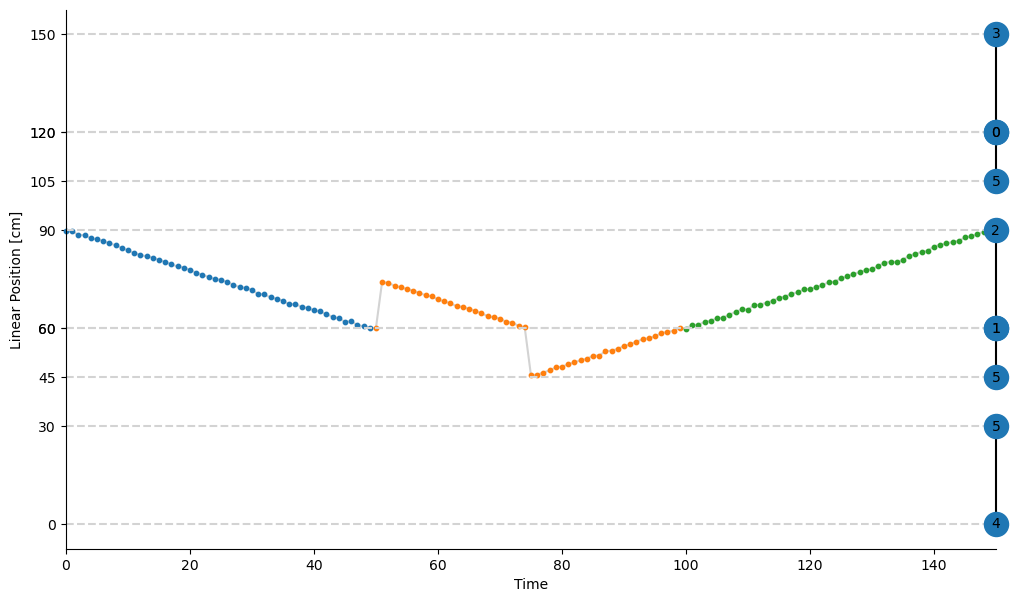

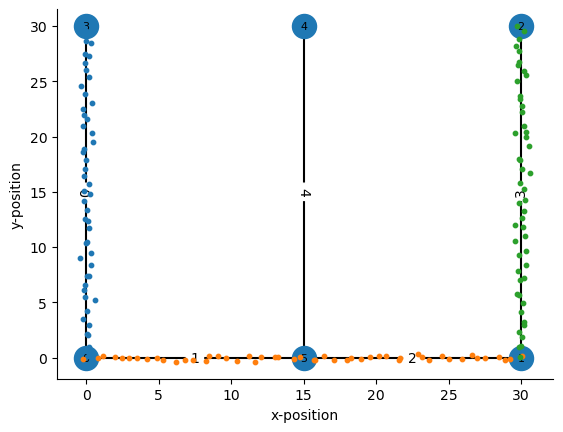

In [23]:
position_df = get_linearized_position(
    position=position,
    track_graph=track_graph,
    edge_spacing=edge_spacing,
    edge_order=edge_order,
    edge_map=edge_map,
)

fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(
    position_df.index[:50],
    position_df.linear_position[:50],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[50:100],
    position_df.linear_position[50:100],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.scatter(
    position_df.index[100:],
    position_df.linear_position[100:],
    s=10,
    zorder=2,
    clip_on=False,
)
ax.plot(
    position_df.index,
    position_df.linear_position,
    color="lightgrey",
    zorder=1,
    clip_on=False,
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlim((0, position_df.shape[0]))
ax.set_ylabel("Position")
ax.set_xlabel("Time")
plot_graph_as_1D(
    track_graph,
    edge_order=edge_order,
    edge_spacing=edge_spacing,
    ax=ax,
    axis="y",
    other_axis_start=position_df.index.max() + 1,
)

start_node_linear_position = 0.0
ticks = []

for ind, edge in enumerate(edge_order):
    end_node_linear_position = (
        start_node_linear_position + track_graph.edges[edge]["distance"]
    )
    ax.axhline(start_node_linear_position, color="lightgrey", linestyle="--")
    ax.axhline(end_node_linear_position, color="lightgrey", linestyle="--")
    ticks.append(start_node_linear_position)
    ticks.append(end_node_linear_position)
    try:
        start_node_linear_position += (
            track_graph.edges[edge]["distance"] + edge_spacing[ind]
        )
    except IndexError:
        pass
ax.set_yticks(ticks)

fig, ax = plt.subplots()
plot_track_graph(track_graph, ax=ax, draw_edge_labels=True)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_xlabel("x-position")
ax.set_ylabel("y-position")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.scatter(position[:50, 0], position[:50, 1], s=10, zorder=11)
plt.scatter(position[50:100, 0], position[50:100, 1], s=10, zorder=11)
plt.scatter(position[100:, 0], position[100:, 1], s=10, zorder=11)